In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import edhec_risk_kit as erk

# Monte Carlo Simulation

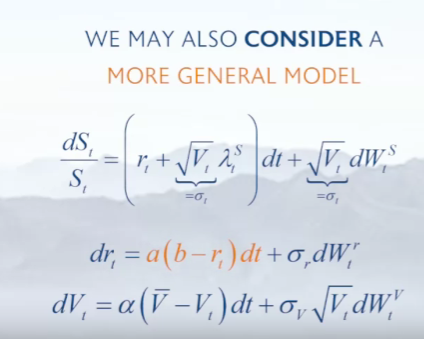

Assuming a mean-reverting model for interest rates, what happens when the current interest rate value is below the long-term mean value?

When interest rate is below its long-term mean value, it tends to go back up to the long-term mean value on average, with an intensity which is proportional to the speed of mean-reversion.

Question
Assuming a mean-reverting model for interest rates with long-term mean level equal to 2%. If the current level of interest rate is 3% and if the speed of mean reversion is 0.5, what is the average annual expected change in interest rate?

A: The expected change in interest rate is given by 0.5x(1%-2%)=-0.5%.     

# Lab Session-Random Walks and Monte Carlo

Recall that the stochastic model for asset returns is given by the Geometric Brownian Motion process:

$$ \frac{S_{t+dt}-S_t}{S_t} = \mu dt + \sigma\sqrt{dt}\xi_t $$

In [2]:
import numpy as np
import pandas as pd

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    #delta time
    dt= 1/steps_per_year
    n_steps= int(n_years*steps_per_year)
    # Psi is the random
    xi=np.random.normal(size=(n_steps, n_scenarios))
    rets=mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices= s_0*(1+rets).cumprod()
    return prices

In [3]:
p=gbm(10,n_scenarios=3)

In [4]:
p.shape

(120, 3)

In [5]:
p.head()

,0,1,2
0,106.336424,98.889876,106.746052
1,104.937313,102.031993,108.457633
2,105.668476,107.336266,108.073292
3,105.026698,106.887204,106.464462
4,100.831398,103.675351,107.599897


<Axes: >

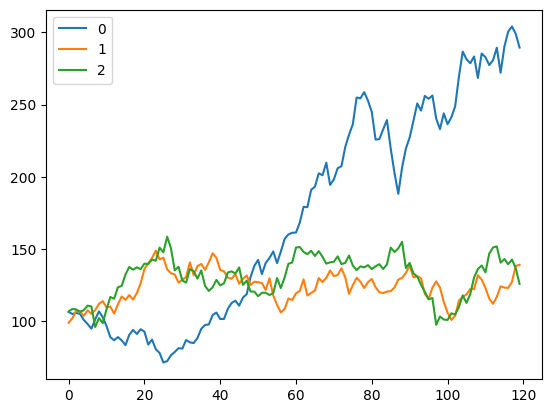

In [6]:
p.plot()

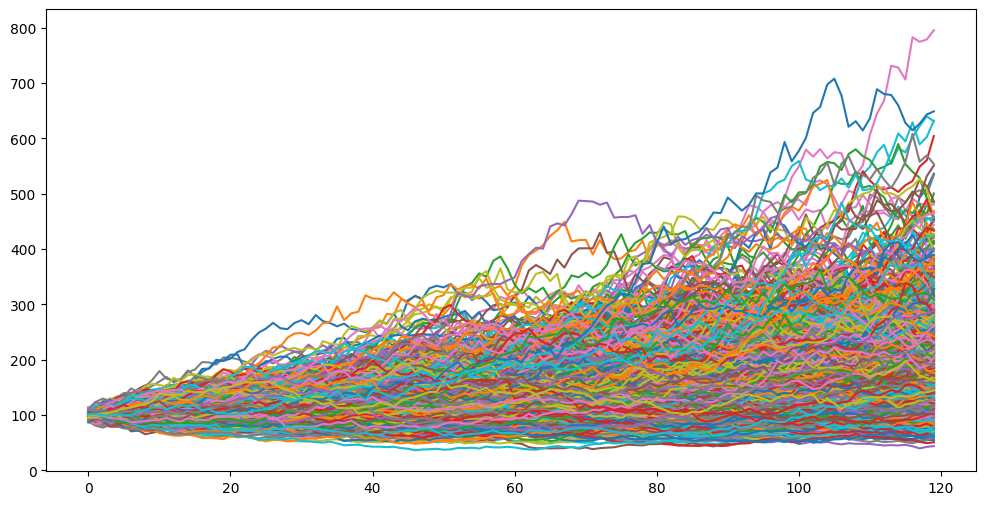

In [7]:
p=gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [8]:
import numpy as np
import pandas as pd

def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    #delta time
    dt= 1/steps_per_year
    n_steps= int(n_years*steps_per_year)
    # Psi is the random
    xi=np.random.normal(size=(n_steps, n_scenarios))
    rets=mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    # to prices
    prices= s_0*(1+rets).cumprod()
    return prices


#rewrite the above model, be more efficient, avoiding loops in model.
def gbm1(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    #delta time
    dt= 1/steps_per_year
    n_steps= int(n_years*steps_per_year)
    # Psi is the random
    rets_plus_1=np.random.normal(loc=(mu*dt) ,scale=(sigma*np.sqrt(dt)) ,size=(n_steps, n_scenarios))
    # to prices
    prices= s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [9]:
%timeit gbm(n_years=5, n_scenarios=1000)

2.25 ms ± 343 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%timeit gbm1(n_years=5, n_scenarios=1000)

2.48 ms ± 311 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<Axes: >

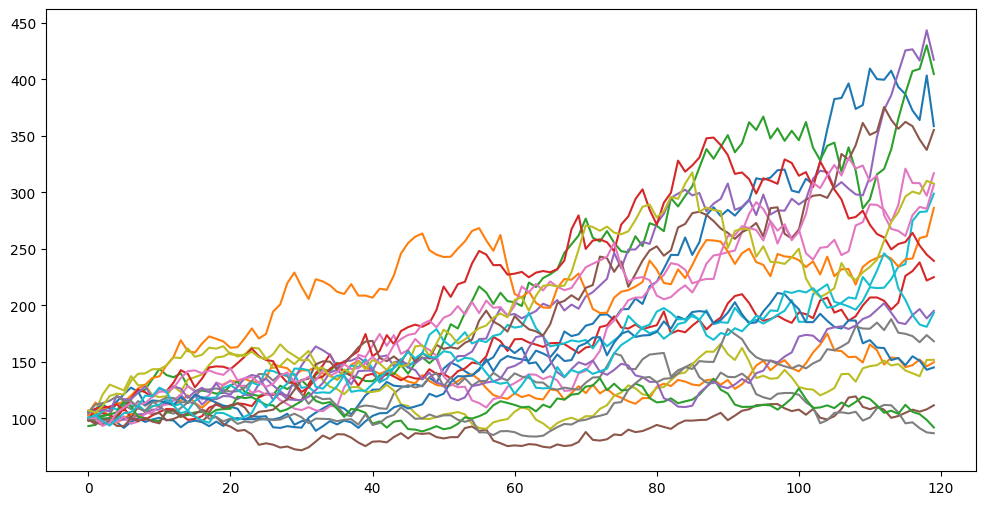

In [11]:
gbm(n_years=10, n_scenarios=20).plot(legend=False,figsize=(12,6))

In [12]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a Stock Price using a Geometric Brownian Motion Model
    """
    #delta time
    dt= 1/steps_per_year
    n_steps= int(n_years*steps_per_year)
    # Psi is the random
    rets_plus_1=np.random.normal(loc=(mu*dt) ,scale=(sigma*np.sqrt(dt)) ,size=(n_steps, n_scenarios))
    rets_plus_1[0]=1
    # to prices
    prices= s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [13]:
gbm(n_scenarios=10).head()

,0,1,2,3,4,5,6,7,8,9
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,-1.894311,-5.702546,-2.704021,0.300328,1.610122,1.704005,-3.063733,3.616445,-2.766639,1.394624
2,-0.042117,0.129070,-0.212641,-0.018787,-0.062451,-0.043684,-0.005574,-0.072049,0.292799,0.088839
3,0.000397,0.000939,-0.006805,-0.001134,0.000605,0.001601,-0.000354,0.002378,-0.012178,-0.001732
4,0.000032,0.000002,0.000381,-0.000063,0.000019,-0.000034,-0.000017,-0.000042,0.000008,0.000041


#Analyzing CPPI strategies

u(mu) parameter: can impact the drift of the trend
sigma parameter: volatility of each scenario could be large, expanding the possible outcomes.
